In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
n_sample = 50000
data = [0]
for idx in range(1,n_sample):
    data.append(np.random.uniform(-np.sqrt(3),np.sqrt(3)) + 0.8*data[idx-1]) # x_[n] = u_[n] + 0.8*x_[n-1]

(0, 1000)

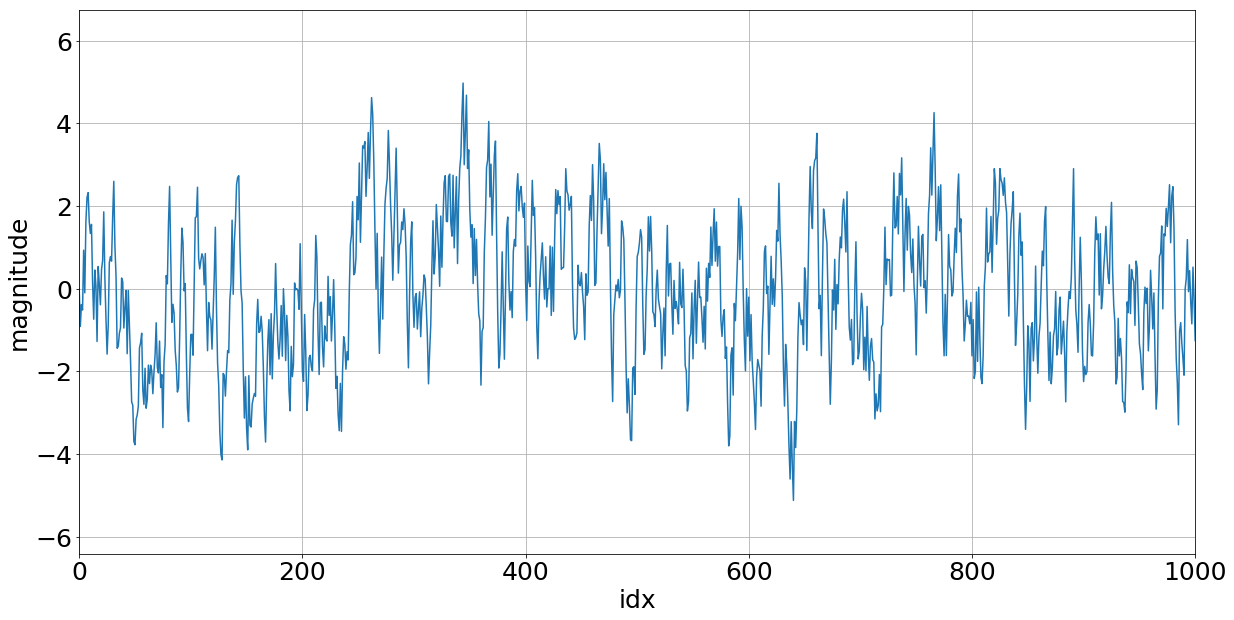

In [32]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(data)
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
ax.grid()
ax.set_xlabel('idx', fontsize=25)
ax.set_ylabel('magnitude', fontsize=25)
ax.set_xlim(0,1000)

In [33]:
X = []
y = []
COV_X = []

for two_sample_before, one_sample_before, curr in zip(data[0:-2:], data[1:-1:], data[2::]):
    #print(two_sample_before, one_sample_before, curr)
    vector1 = np.array([one_sample_before, two_sample_before]) 
    vector2 = np.array([curr, one_sample_before]) # for R
    X.append(vector1)
    y.append(curr)
    COV_X.append(vector2)
X = np.vstack(X)
y = np.array(y)
COV_X = np.vstack(COV_X)

In [34]:
R = np.cov(COV_X.T)
p = y.dot(X)/len(y)
w = np.linalg.inv(R).dot(p)
prediction = X.dot(w)

In [35]:
w

array([ 0.80109668, -0.00111461])

(0, 1000)

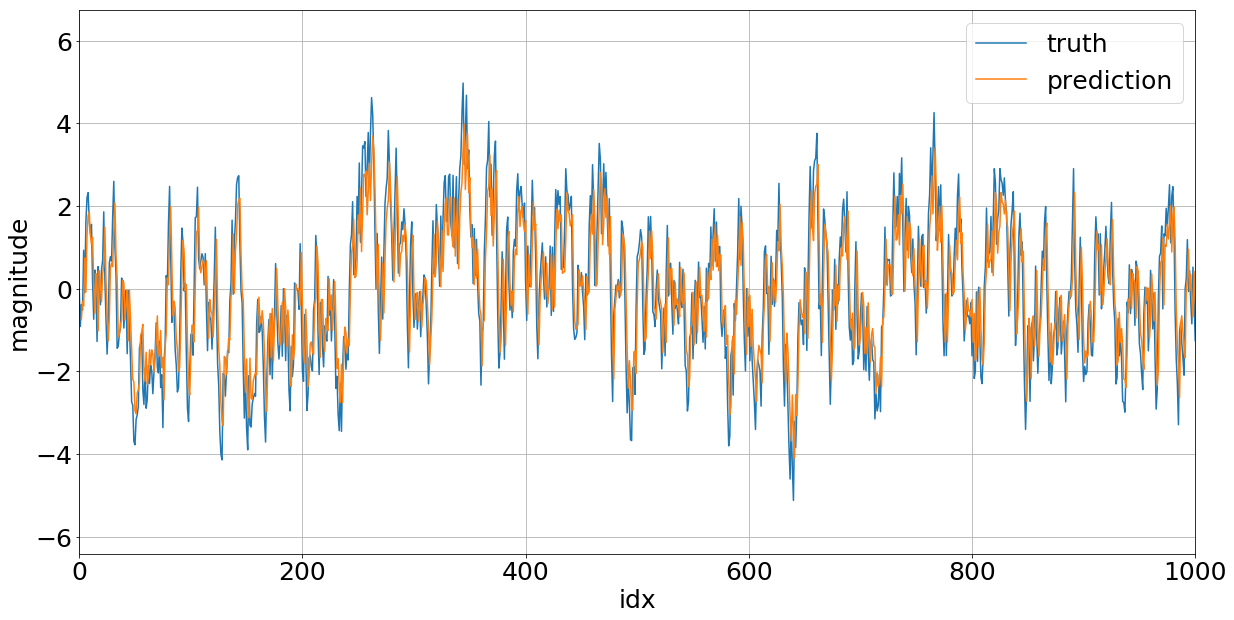

In [36]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(data, label='truth')
ax.plot(np.arange(2,n_sample), prediction, label='prediction')
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
ax.grid()
ax.set_xlabel('idx', fontsize=25)
ax.set_ylabel('magnitude', fontsize=25)
ax.legend(fontsize=25)
ax.set_xlim(0,1000)

In [42]:
error = y.dot(y)/n_sample - p.dot(w)
error

1.0018703112904181